<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

ASSIGNMENT - SESSION 10 - Decision Tree

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

# 10.1 Theory Review

## 10.1.1 [1 Point] Decision Trees vs. MLPs

- What are the main differences between nonlinear models MLPs and Decision Trees?
- Các điểm khác biệt chính giữa 2 mô hình phi tuyến là Mạng nơ-ron nhiều lớp & Cây Quyết Định?

**Answers**:
- 1) Decision boundary: arbitrary curves for MLPs but *segments* parallel with axes for Decision Trees. For regression surface: arbitrary for MLPs but *block-wise* for Decision Trees 2) Explainability 
- Hai điểm khác biệt chính: 1) Decision boundary & regression surface của MLP là bất kỳ nhưng của Decision Trees là cho từng khối, vùng của đầu vào ; 2) khả năng giải thích.

## 10.1.2 [1 Point] Decision Trees' predicted output

- How outputs are calculated? How to measure its quality?
- Dự báo đầu ra của cây-quyết-định được tính ra sao? Chất lượng của các dự báo này được tính ra sao?

**Answers**:
- For regression: average of data subset at leaf nodes; smaller spreading (standard deviation) is better. For classification: majority label of data subset at leaf nodes; smaller entropy is better. 
- Cho bài toán regression: trung bình của bộ dữ liệu node cuối, càng ít phân tán càng tốt. Cho bài toán phân loại: class có số labels cao nhất đc chọn; càng đồng nhất càng tốt.


#10.2 Coding Practice

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Nội dung Assignment

*   Decision Tree - Decision boundary
*   Thực hành Random Forest và Decision Tree trên dataset Pima Indians Diabetes (Dự đoán bệnh tiểu đường)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
# matplotlib options
rcParams['figure.figsize'] = (12, 7) # default figsize
rcParams['axes.grid'] = False # turn off grid by default

##10.2.1 [1 Point] Decision Boundary of Decision Tree

Ở phần này chúng ta sẽ dùng Decision Tree để phân loại các bông hoa thuộc họ Iris **`Setosa, Versicolor, Virginica`**

Iris dataset bao gồm 4 feature là **`petal length, petal width, sepal length, sepal width`** (chiều dài, chiều rộng của cánh hoa và đài hoa). 

Tuy nhiên ở phần này chúng ta chỉ dùng 2 feature là **`petal length, petal width`** để dễ cho việc visualize decision boundary.

### 10.2.1.1 [0.5 Point] Chuẩn bị dataset

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

**Kiểm tra shape của X, y**

In [ ]:
# TODO
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (150, 2)
Shape of y: (150,)


**Kiểm tra độ balance giữa các label trong dataset**

Text(0.5, 1.0, 'Classes distribution')

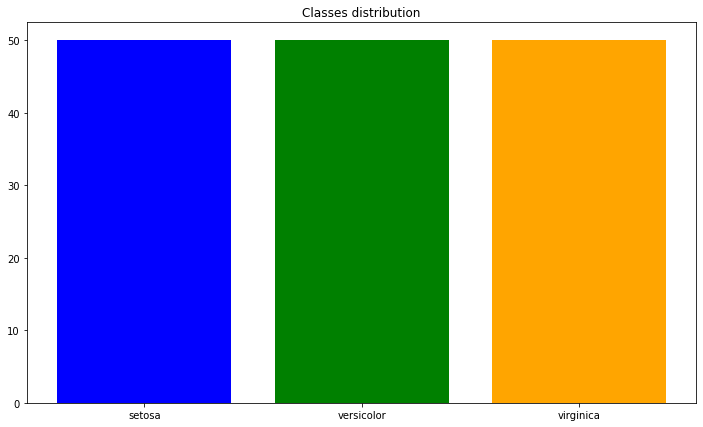

In [ ]:
# TODO
# 1. Plot bar chart to show the distribution of 3 classes in Iris dataset

class_names = iris.target_names
data = np.unique(y, return_counts=True)[1]
plt.bar(class_names, data, color=['blue', 'green', 'orange'])
plt.title('Classes distribution')

**Train Test Split**

In [ ]:
# TODO
# 1. Split X, y into Train and Test Set
# 2. test_size=0.4
# 3. Remember to set stratify
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, shuffle=True, random_state=42)

### 10.2.1.2 [0.5 Point] Khởi tạo và huấn luyện Decision Tree

In [ ]:
# TODO
# 1. Import DecisionTreeClassifier from sklearn
# 2. Create a tree with random_state=42
# 3. Fit model on X_train, y_train
# 4. Use score() function on Train Set and Test Set

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print('Accuracy on Train Set', model.score(X_train, y_train))
print('Accuracy on Test Set', model.score(X_test, y_test))


Accuracy on Train Set 0.9888888888888889
Accuracy on Test Set 0.95


**Decision boundary**

In [ ]:
def plot_decision_boundary(X, Y, model, title):
  plt.title(title)

  range = 0.05
  xm = np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, range)
  xlen = len(xm)
  ym = np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, range)
  ylen = len(ym)
  xx, yy = np.meshgrid(xm, ym)

  xx1 = xx.ravel().reshape(1, xx.size)
  yy1 = yy.ravel().reshape(1, yy.size)

  X0 = np.vstack((xx1, yy1)).T

  Y_hat = model.predict(X0)

  Z = Y_hat

  Z = Z.reshape(xx.shape)
  CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha=.1)

  plt.scatter(X[:,0], X[:,1], c=Y, s=10)
  plt.xlim(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5)
  plt.ylim(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5)
  plt.show()

**Decision boundary trên Train Set**

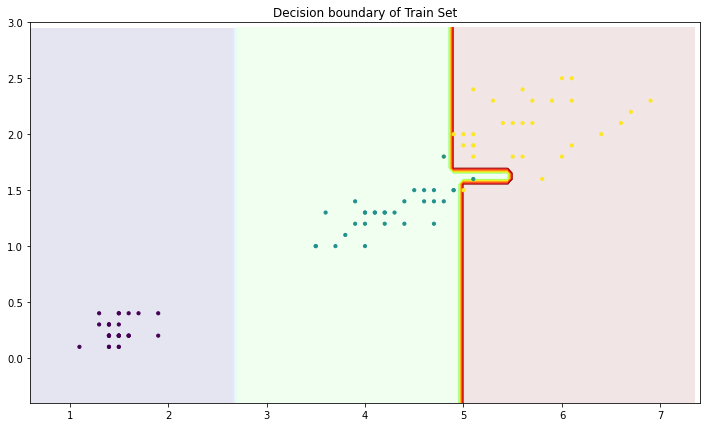

In [ ]:
plot_decision_boundary(X_train, y_train, model, 'Decision boundary of Train Set')

**Decision boundary trên Test Set**

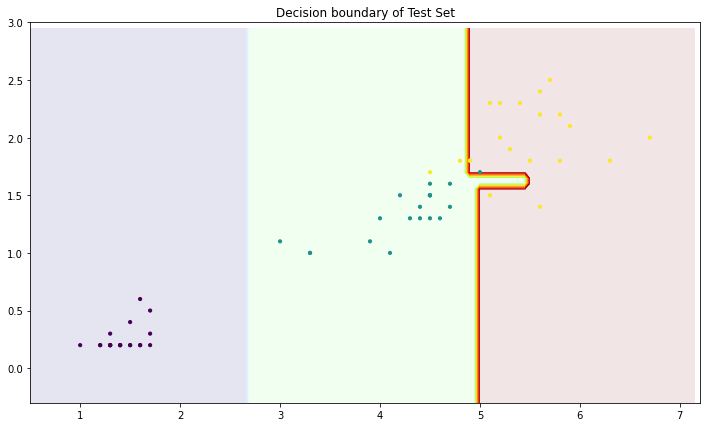

In [ ]:
plot_decision_boundary(X_test, y_test, model, 'Decision boundary of Test Set')

### 10.2.1.3 Decision Tree's Hyper-Parameters Tuning


**Đọc thêm**

[Thế nào là siêu tham số](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/)

[Các hyper-parameters trong Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

Mô hình Decision Tree trong thư viện sklearn có khá nhiều hyper-parameters (siêu tham số)

Trong bài này, ta chỉ thực hiện tuning với một vài siêu tham số phổ biến thôi để xem kết quả của mô hình có khả thi hơn không.



In [ ]:
from sklearn.model_selection import GridSearchCV

max_leaf_nodes = list(np.arange(2, 20, 1, dtype='int'))
max_leaf_nodes.append(None)

max_depth = list(range(2,10))
max_depth.append(None)
# print(max_depth)

params = {
    'criterion': ['entropy','gini'],
    'max_depth': max_depth,
    'random_state': [42],
    'max_leaf_nodes': max_leaf_nodes,  
    'min_samples_split': np.arange(2, 20, 1, dtype='int'), 
    'max_features': [None, 'auto', 'sqrt', 'log2'],
}

model = DecisionTreeClassifier()

grid = GridSearchCV(model, params, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': 4,
 'min_samples_split': 2,
 'random_state': 42}

Lấy ra best_model sau khi tune và evaluate trên Train Set lẫn Test Set

In [ ]:
best_model = grid.best_estimator_
print('Accuracy on Train Set', best_model.score(X_train, y_train))
print('Accuracy on Test Set', best_model.score(X_test, y_test))

Accuracy on Train Set 0.9777777777777777
Accuracy on Test Set 0.9833333333333333


Vẽ lại Decision boundary

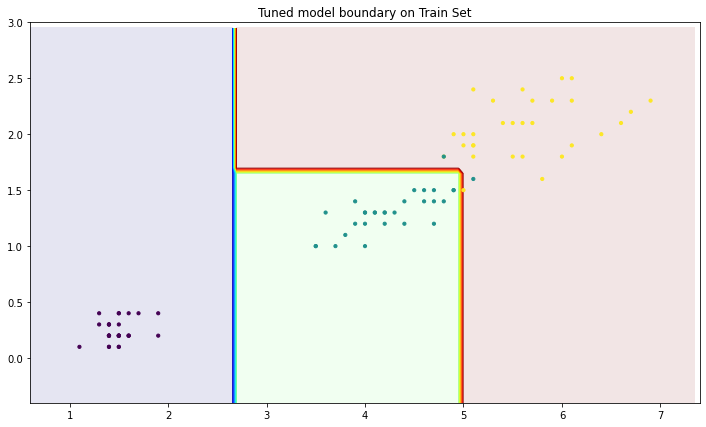

In [ ]:
plot_decision_boundary(X_train, y_train, best_model, 'Tuned model boundary on Train Set')

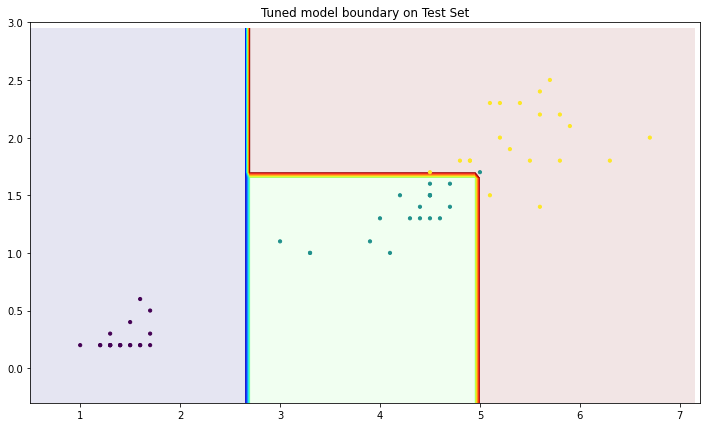

In [ ]:
plot_decision_boundary(X_test, y_test, best_model, 'Tuned model boundary on Test Set')

Ta thấy được rõ ràng Decision Boundary mới nhìn hợp lý hơn so với Decision Boundary cũ.

**Nhắc lại về kỹ thuật K-folds cross-validation**

- Khi dùng GridSearchCV, sklearn sẽ dùng kỹ thuật **K-folds cross-validation** để tạo ra tập dữ liệu Validation và tìm ra bộ hyper-parameter hoạt động tốt nhất trên tập **k tập Train** và **k tập Validation**. ![](https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png)



**Vẽ Decision Tree**

In [ ]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# draw tree
def drawTree(model):
  dot_data = StringIO()
  export_graphviz(model, out_file=dot_data,  
                  filled=True, rounded=True,
                  special_characters=True,
                  feature_names = iris.feature_names[2:],
                  class_names= iris.target_names
                  )
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
  return graph.create_png()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


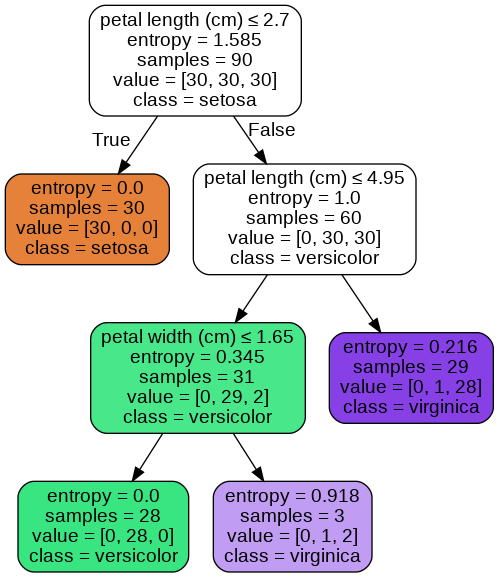

In [ ]:
Image(drawTree(best_model))

## 10.2.2 [1 Point] Giải thích cây quyết định ở trên bằng lời nói



**Your answer here**

## 10.2.3 [1 Points] Decision Tree versus Random Forest cho bài toán dự báo bệnh tiểu đường

Tên của dataset: Pima Indians Diabetes Database

Dataset chứa thông tin về sức khỏe của các bệnh nhân nữ (21 tuổi trở lên) ở Ấn Độ

Nhiệm vụ của chúng ta là thiết kế mô hình Decision Tree và Random Forest để dựa vào thông tin sức khỏe của các bệnh nhân, dự báo xem họ có bị tiểu đường không.

**DATASET LINK** https://drive.google.com/file/d/1Ffu0JV21aYUeVTl7Yey4vbYRtGMhBkdR/view?usp=sharing

### 10.2.3.1 Chuẩn bị dataset

In [ ]:
import pandas as pd

PATH = '/content/drive/My Drive/COTAI_Training/10. Tree/diabetes.csv'

df = pd.read_csv(PATH)

Kiểm tra shape

In [ ]:
# TODO
df.shape

(768, 9)

Xem thử 10 dòng đầu tiên

In [ ]:
# TODO
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Kiểm tra null và kiểu dữ liệu của data

In [ ]:
# TODO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 10.2.3.2 Visualize data

**Đọc thêm**

[Pairplot Intuition](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)

**Vẽ pairplot**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


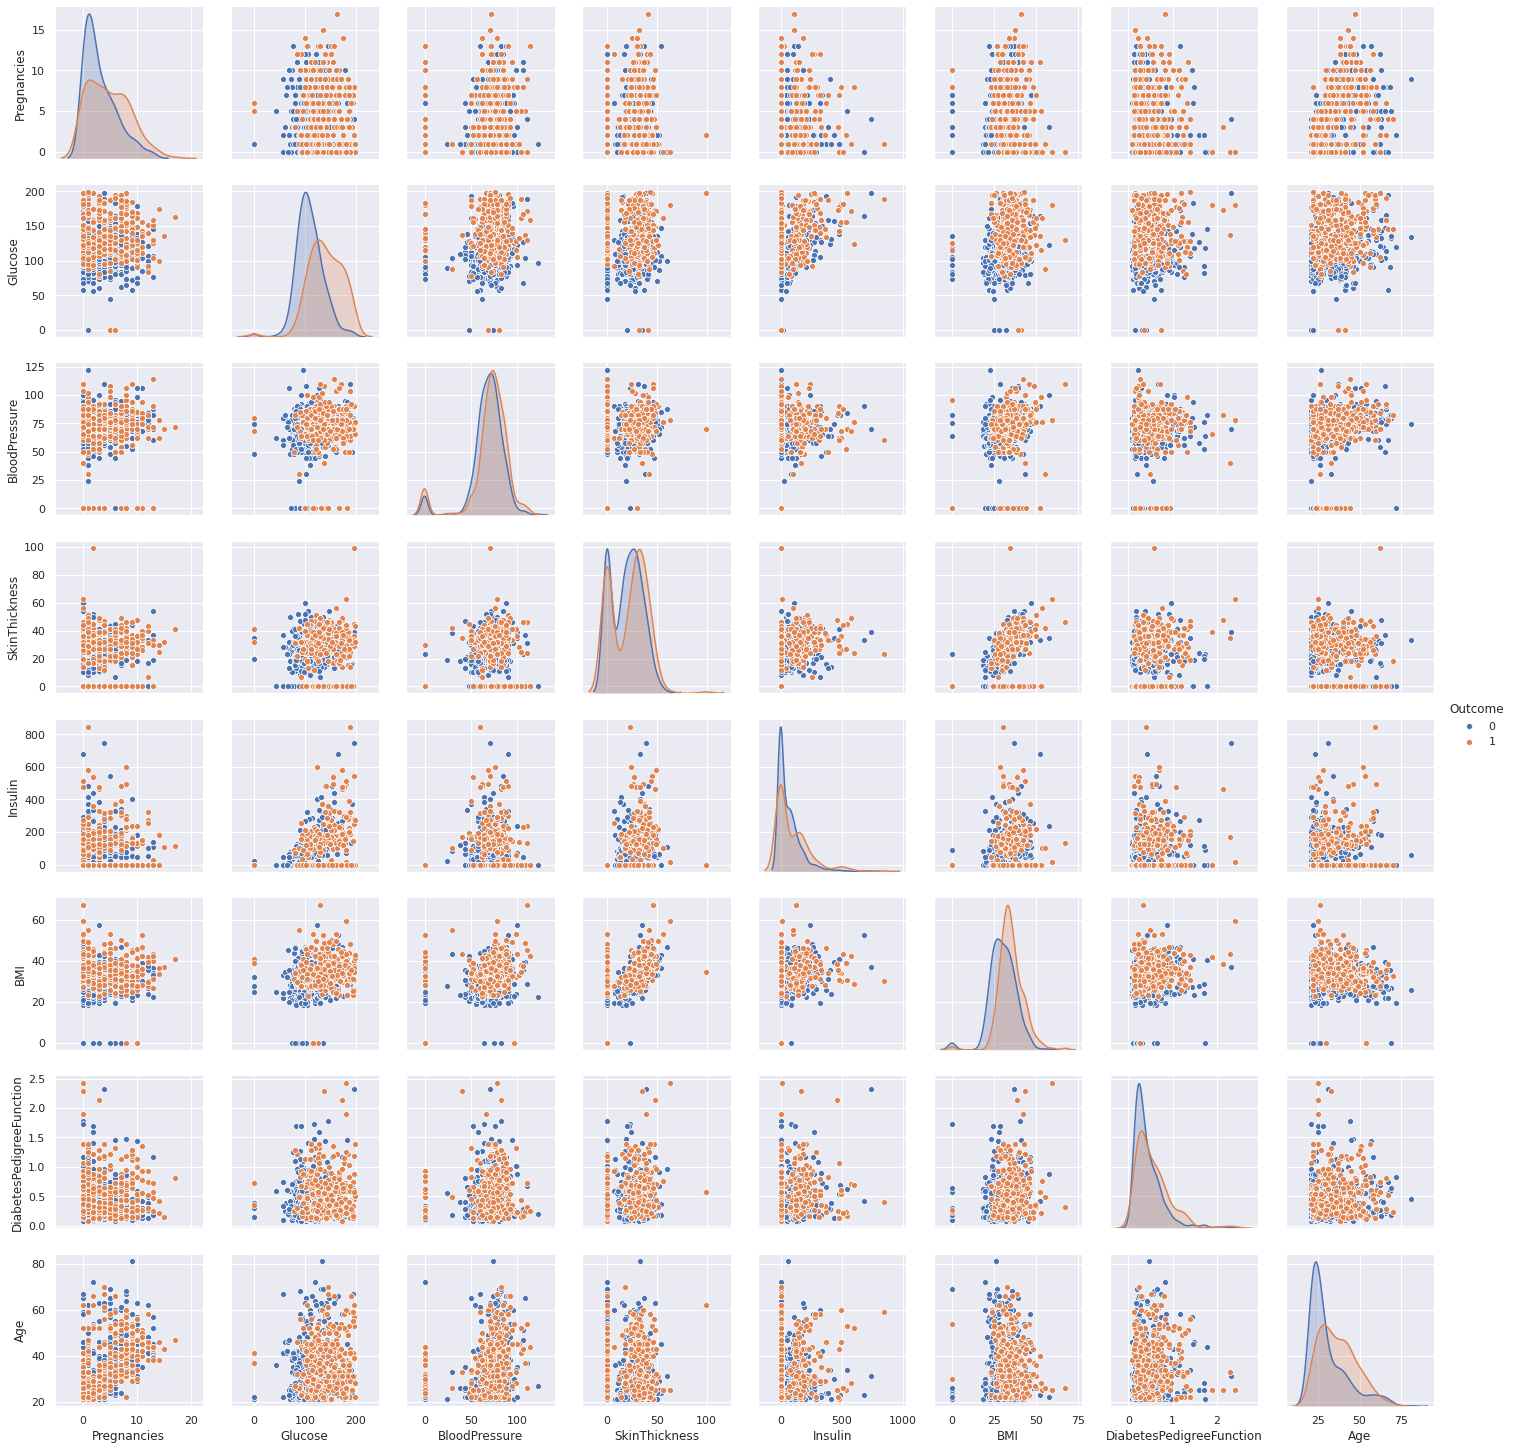

In [ ]:
import seaborn as sns
sns.set()
sns.pairplot(df, hue='Outcome')

Double-clicks vào hình trên để phóng to

Học viên nên tập cách đọc hiểu pair-plot ở trên.




### 10.2.3.3 [0.5 Point] Dữ liệu trong dataset này có nhiều điểm bất hợp lý, hãy thử nghiên cứu pair-plot bên trên xem bạn có thể phát hiện được những chỗ bất hợp lý không nhé

**Your answer here**

Các feature **`Insulin, SkinThickness, BloodPressure, BMI, Glucose`** có rất nhiều value bằng 0. Ở những feature này, value = 0 tương ứng với việc dữ liệu tại đó là null (nan / na)

### 10.2.3.3 [0.5 Point] Huấn luyện model

**Note**

Ở đây, ta sẽ giả sử dataset này không có gì sai cả và tiến hình implement model như bình thường.

Việc clean-data sẽ được học ở bài Data Engineering

**Train Test Split**

Đầu tiên ta tách X, y ra từ dataframe trên, sau đó dùng train_test_split để chia thành Train Set và Test Set

In [ ]:
# TODO
# 1. split df to X, y
# 2. print out the shape of X, y to check
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [ ]:
# TODO
# 1. Split X, y into Train and Test Set
# 2. test_size=0.4
# 3. Remember to set stratify
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, shuffle=True, random_state=42)

**Tạo và huấn luyện model Decision Tree và Random Forest**

In [ ]:
# TODO
# 1. Create model for Decision Tree and RandomForest
# 2. Fit both models on Train Set
# 3. Use score() function on Train Set and Test Set

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

model_decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
model_randomforest = RandomForestClassifier(criterion='entropy', max_depth=4, random_state=1613, n_estimators=300)

model_decisiontree.fit(X_train, y_train)
model_randomforest.fit(X_train, y_train)

print('Decision Tree score on Train Set: ' + str(model_decisiontree.score(X_train, y_train)))
print('Decision Tree score on Test Set: ' + str(model_decisiontree.score(X_test, y_test)))

print('Random Forest score on Train Set: ' + str(model_decisiontree.score(X_train, y_train)))
print('Random Forest score on Test Set: ' + str(model_decisiontree.score(X_test, y_test)))


Decision Tree score on Train Set: 0.808695652173913
Decision Tree score on Test Set: 0.7435064935064936
Random Forest score on Train Set: 0.808695652173913
Random Forest score on Test Set: 0.7435064935064936


**Tham khảo cách dùng ``GridSearchCV`` ở bài 1, và tự áp dụng thử vào 2 mô hình trên xem kết quả có khả quan hơn không.**

Assignment đến đây là hết, chúng ta sẽ quay trở lại bài toán này sau khi học xong bài Data Engineering.

Sau khi hoàn thành Assignment, học viên có thể đọc thêm về các hyper-parameters của Random Forest và thử áp dụng tuning cho cả 2 mô hình xem kết quả có tốt hơn không nhé
[Random Forest's hyper-parameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)